In [1]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import filedialog
from matplotlib import pyplot as plt
import joblib
from PIL import Image, ImageOps
from PIL import ImageTk
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [2]:
#On charge le dataset MNIST
df = pd.read_csv("C:\\Users\\GIS PLUS\\Desktop\\mnist_train\\mnist_train.csv")

In [3]:
df.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(60000, 785)

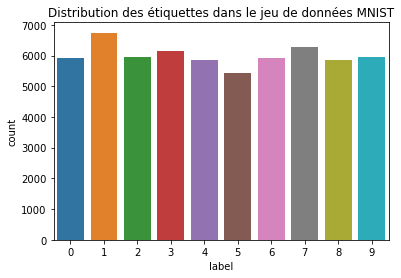

In [5]:
# Examinez la distribution des étiquettes (labels)
sns.countplot(x=df['label'])
plt.title('Distribution des étiquettes dans le jeu de données MNIST')
plt.show()

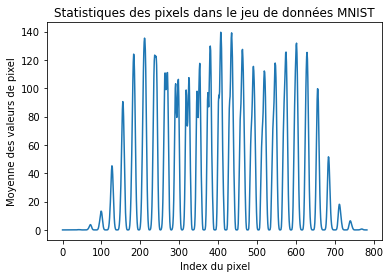

In [6]:
# Analysez les statistiques des pixels
pixel_stats = np.mean(df.iloc[:, 1:].values, axis=0)
plt.plot(pixel_stats)
plt.title('Statistiques des pixels dans le jeu de données MNIST')
plt.xlabel('Index du pixel')
plt.ylabel('Moyenne des valeurs de pixel')
plt.show()

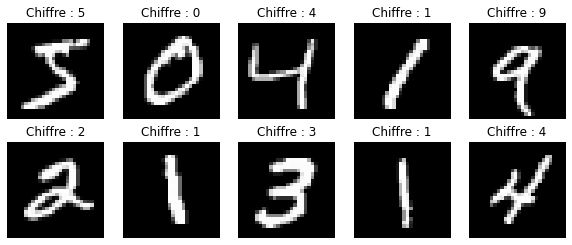

In [7]:
# Visualisez quelques images du jeu de données
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(df.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Chiffre : {df.iloc[i, 0]}")
    ax.axis('off')
plt.show()

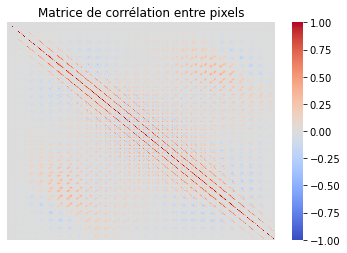

In [9]:
# Visualisez les corrélations entre pixels
corr_matrix = np.corrcoef(df.iloc[:, 1:].values.T)

# Vérifiez et remplacez les NaN ou inf par 0
corr_matrix = np.nan_to_num(corr_matrix)

# Vérifiez et remplacez les inf par une valeur élevée (optionnel)
corr_matrix[corr_matrix == np.inf] = 1e10

# Vérifiez et remplacez les -inf par une valeur basse (optionnel)
corr_matrix[corr_matrix == -np.inf] = -1e10

sns.heatmap(corr_matrix, cmap='coolwarm', xticklabels=False, yticklabels=False, vmin=-1, vmax=1)
plt.title('Matrice de corrélation entre pixels')
plt.show()


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [11]:
print(df.isnull().sum())

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64


In [12]:
from sklearn.preprocessing import LabelBinarizer
# Exemple de labels
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# Encodage one-hot avec LabelBinarizer
label_binarizer = LabelBinarizer()
one_hot_encoded = label_binarizer.fit_transform(labels)
print("Labels originaux :", labels)
print("Labels encodés en one-hot :", one_hot_encoded)

Labels originaux : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Labels encodés en one-hot : [[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]


In [13]:
#On crée la cible y (colonne 'label')
y = df['label']

In [14]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# les caractéristiques X
X = df.drop(['label'], axis=1)

In [16]:
# Normalisation
X = X / 255.0

In [17]:
#On sépare les ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
# Normalisation des ensembles d'apprentissage et de test
X_train = X_train / 255.0
X_test = X_test / 255.0

In [19]:
# Création de l'array NumPy
X1_train = np.array(X_train)
X1_test = np.array(X_test)

In [20]:
# On affiche la première ligne de l'ensemble d'apprentissage
print(X1_train[0])

# Ou si vous voulez afficher la première ligne de l'ensemble de test
print(X1_test[0])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [21]:
# On applique la méthode reshape pour convertir cette ligne de 784 éléments en une matrice 28x28
image_train = X1_train[0].reshape(28, 28)
print("Première ligne de l'ensemble d'apprentissage:")
print(image_train)

# Ou si vous voulez faire la même chose pour l'ensemble de test
image_test = X1_test[0].reshape(28, 28)
print("Première ligne de l'ensemble de test:")
print(image_test)

Première ligne de l'ensemble d'apprentissage:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.000

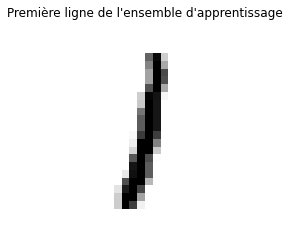

In [22]:
# On peut maintenant afficher cette matrice en niveaux de gris, sans graduation des axes, et avec le label comme titre 
plt.imshow(image_train, cmap="gray_r")
plt.axis('off')
plt.title("Première ligne de l'ensemble d'apprentissage")
plt.show()

# Ou si vous voulez faire la même chose pour l'ensemble de test
# plt.imshow(image_test, cmap="gray_r")
# plt.axis('off')
# plt.title("Première ligne de l'ensemble de test")
# plt.show()



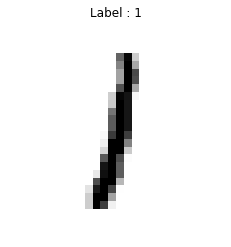

In [23]:
# Affichage de l'image en niveaux de gris, sans graduation des axes, avec le label correct comme titre
plt.imshow(image_train, cmap="gray_r")
plt.axis('off')
plt.title(f"Label : {y_train.iloc[0]}")
plt.show()

In [24]:
# On redimensionne toutes les lignes de l'ensemble d'apprentissage
n_samples_train = len(X1_train)
images_train = X1_train.reshape(n_samples_train, 28, 28)

# On redimensionne toutes les lignes de l'ensemble de test
n_samples_test = len(X1_test)
images_test = X1_test.reshape(n_samples_test, 28, 28)

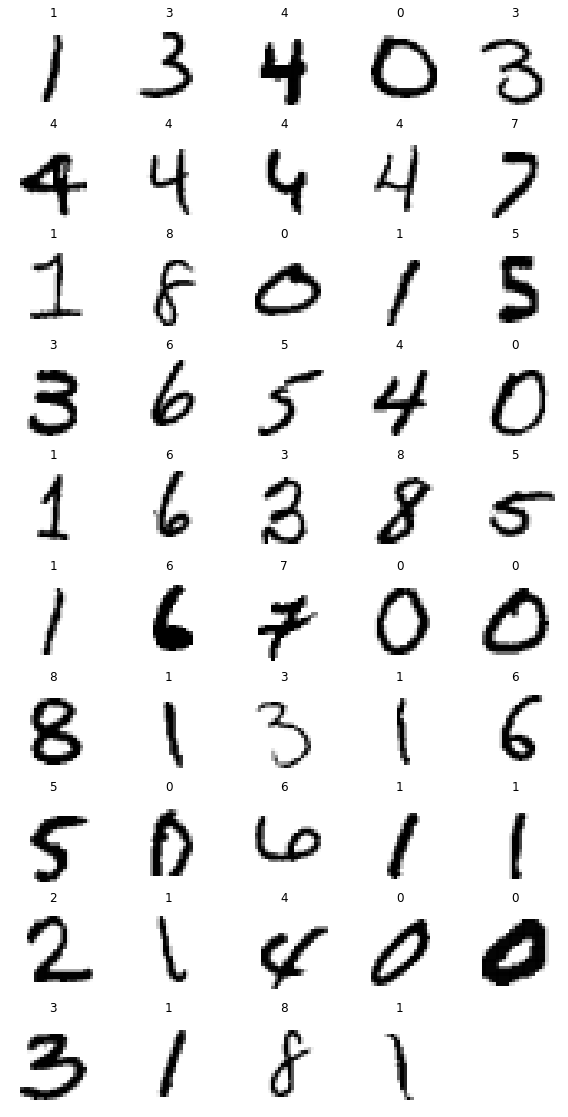

In [25]:
# On affiche les 50 premiers
plt.figure(figsize=(10,20))
for i in range(0, 49):
    plt.subplot(10, 5, i+1)
    plt.axis('off')
    plt.imshow(images_train[i], cmap="gray_r")
    plt.title(y_train.iloc[i])

In [26]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

In [27]:
# Calculer et afficher le score d'exactitude
rf_score = accuracy_score(y_test, y_rf)
print("Accuracy Score :", rf_score)

Accuracy Score : 0.9441666666666667


In [28]:
# Afficher la matrice de confusion
pd.crosstab(y_test, y_rf, rownames=['Real'], colnames=['Prediction'], margins=True)

Prediction,0,1,2,3,4,5,6,7,8,9,All
Real,,,,,,,,,,,
0,1136,1,2,2,2,1,4,0,10,0,1158
1,0,1347,7,4,2,4,2,2,4,1,1373
2,3,6,1134,10,12,0,6,11,6,6,1194
3,3,7,26,1140,3,19,2,10,16,11,1237
4,1,0,4,0,1085,0,8,3,7,49,1157
5,7,13,3,16,2,1039,9,3,11,7,1110
6,11,3,1,0,5,10,1146,2,9,0,1187
7,1,11,18,0,13,0,0,1182,6,34,1265
8,3,16,7,13,6,11,15,8,1060,33,1172


In [29]:
# Afficher le rapport de classification
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1158
           1       0.96      0.98      0.97      1373
           2       0.94      0.95      0.94      1194
           3       0.95      0.92      0.94      1237
           4       0.94      0.94      0.94      1157
           5       0.95      0.94      0.95      1110
           6       0.96      0.97      0.96      1187
           7       0.95      0.93      0.94      1265
           8       0.93      0.90      0.92      1172
           9       0.88      0.93      0.90      1147

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000



In [30]:
from sklearn.model_selection import cross_val_score
 #Appliquer la cross-validation avec, par exemple, k=5 plis
cv_scores = cross_val_score(ensemble.RandomForestClassifier(), X_train, y_train, cv=5)
 #Afficher les scores de validation croisée
print("Cross-Validation Scores:", cv_scores)
# Afficher la moyenne des scores de validation croisée
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.964375   0.9665625  0.9634375  0.96520833 0.96447917]
Mean Cross-Validation Score: 0.9648125000000001


C:\Anaconda\envs\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


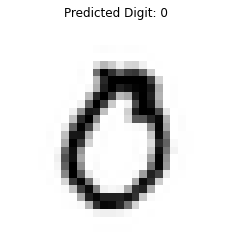

In [31]:
from sklearn import ensemble
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt


# Load the trained RandomForest model
rf_model = rf
# Fournir les noms de fonctionnalités lors de la prédiction
feature_names = X.columns  # Assurez-vous d'avoir les bons noms de fonctionnalités
X_test_with_names = X_test.copy()  # Copiez le jeu de test pour ne pas le modifier
X_test_with_names.columns = feature_names  # Assurez-vous que les colonnes ont les bons noms

# Effectuer la prédiction avec les noms de fonctionnalités
predictions = rf_model.predict(X_test_with_names)



# Charger l'image dessinée dans Paint
image_path = "C:\\Users\\GIS PLUS\\Desktop\\test0.png"  # Remplacez par le chemin de votre image
input_image = Image.open(image_path)

# Prétraiter l'image pour correspondre au format du jeu de données MNIST
resized_image = ImageOps.fit(input_image, (28, 28), Image.ANTIALIAS)
grayscale_image = resized_image.convert("L")  # Convertir en niveaux de gris

# Convertir l'image en un tableau numpy
image_array = np.array(grayscale_image)

# Aplatir le tableau pour correspondre au format du jeu de données MNIST (784 pixels)
image_flattened = image_array.flatten().reshape(1, -1)

# Faire la prédiction en utilisant le modèle RandomForest
predicted_digit = rf_model.predict(image_flattened)

# Afficher l'image dessinée et le chiffre prédit
plt.imshow(image_array, cmap="gray_r")
plt.axis('off')
plt.title(f"Predicted Digit: {predicted_digit[0]}")
plt.show()



In [40]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageOps
import numpy as np
import joblib
from PIL import ImageTk

class DigitRecognizerApp:
    def __init__(self, master, rf_model):
        self.master = master
        self.master.title("Digit Recognizer")

        self.rf_model = rf_model

        # Add a title label in bold
        title_label = tk.Label(self.master, text="Digit Recognizer", font=("Helvetica", 14, "bold"))
        title_label.pack(pady=10)

        # Load the image icon
        icon_image = Image.open("C:\\Users\\GIS PLUS\\Desktop\\image2.png")
        self.icon_photo = ImageTk.PhotoImage(icon_image)

        # Add the icon image above the title label
        icon_label = tk.Label(self.master, image=self.icon_photo)
        icon_label.image = self.icon_photo
        icon_label.pack()

        # Add the Upload Image button
        self.btn_upload = tk.Button(self.master, text="Upload Image", command=self.upload_image, height=4, width=20)
        self.btn_upload.pack(pady=10)

        # Add spacing between labels and the Upload Image button
        tk.Label(self.master, text="").pack()

        # Label to display the uploaded image
        self.image_label = tk.Label(self.master, text="Image will be displayed here.")
        self.image_label.pack()

        # Label to display the predicted digit
        self.prediction_label = tk.Label(self.master, text="Prediction will be displayed here.")
        self.prediction_label.pack()

    def upload_image(self):
        file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.png;*.jpg;*.jpeg")])

        if file_path:
            input_image = Image.open(file_path).convert("L")  # Convertir en niveaux de gris
            resized_image = ImageOps.fit(input_image, (28, 28), Image.ANTIALIAS)

            # Convertir l'image en un tableau numpy
            image_array = np.array(resized_image)

            # Aplatir le tableau pour correspondre au format du jeu de données MNIST (784 pixels)
            image_flattened = image_array.flatten().reshape(1, -1)

            # Faire la prédiction en utilisant le modèle RandomForest
            predicted_digit = self.rf_model.predict(image_flattened)[0]

            # Afficher l'image sur l'interface
            tk_image = Image.fromarray(image_array)
            tk_image = ImageOps.invert(tk_image.convert("RGB"))  # Inverser les couleurs pour mieux correspondre aux chiffres MNIST
            tk_image = ImageTk.PhotoImage(tk_image)

            self.display_image(tk_image)
            self.display_prediction(predicted_digit)

    def display_image(self, image):
        # Afficher l'image sur l'interface
        self.image_label.config(image=image)
        self.image_label.image = image

    def display_prediction(self, digit):
        # Afficher la prédiction sur l'interface
        self.prediction_label.config(text=f"Predicted Digit: {digit}")

def main():
    # Charger le modèle RandomForest (remplacez 'random_forest_model.joblib' par votre modèle)
    rf_model = joblib.load("C:\\Users\\GIS PLUS\\Desktop\\random_forest_model.joblib")

    root = tk.Tk()
    app = DigitRecognizerApp(root, rf_model)
    # Définir la taille initiale de la fenêtre principale
    root.geometry("400x400")  # Ajustez la taille selon vos besoins
    root.mainloop()

if __name__ == "__main__":
    main()


C:\Anaconda\envs\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#import tkinter as tk
#from PIL import Image, ImageDraw
#import numpy as np
#import joblib
#from IPython.display import display

In [38]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import joblib
from PIL import ImageTk


class DigitRecognizerApp:
    def __init__(self, master, rf_model):
        self.master = master
        self.master.title("Digit Recognizer")

        self.rf_model = rf_model

        self.btn_upload = tk.Button(self.master, text="Upload Image", command=self.upload_image)
        self.btn_upload.pack(pady=10)

        self.image_label = tk.Label(self.master, text="Image will be displayed here.")
        self.image_label.pack()

        self.prediction_label = tk.Label(self.master, text="Prediction will be displayed here.")
        self.prediction_label.pack()

    def upload_image(self):
        file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.png;*.jpg;*.jpeg")])

        if file_path:
            input_image = Image.open(file_path).convert("L")  # Convertir en niveaux de gris
            resized_image = ImageOps.fit(input_image, (28, 28), Image.ANTIALIAS)

            # Convertir l'image en un tableau numpy
            image_array = np.array(resized_image)

            # Aplatir le tableau pour correspondre au format du jeu de données MNIST (784 pixels)
            image_flattened = image_array.flatten().reshape(1, -1)

            # Faire la prédiction en utilisant le modèle RandomForest
            predicted_digit = self.rf_model.predict(image_flattened)[0]

            # Afficher l'image sur l'interface
            tk_image = Image.fromarray(image_array)
            tk_image = ImageOps.invert(tk_image.convert("RGB"))  # Inverser les couleurs pour mieux correspondre aux chiffres MNIST
            tk_image = ImageTk.PhotoImage(tk_image)

            self.display_image(tk_image)
            self.display_prediction(predicted_digit)

    def display_image(self, image):
        # Afficher l'image sur l'interface
        self.image_label.config(image=image)
        self.image_label.image = image

    def display_prediction(self, digit):
        # Afficher la prédiction sur l'interface
        self.prediction_label.config(text=f"Predicted Digit: {digit}")


def main():
    # Charger le modèle RandomForest (remplacez 'random_forest_model.joblib' par votre modèle)
    rf_model = joblib.load("C:\\Users\\GIS PLUS\\Desktop\\random_forest_model.joblib")

    root = tk.Tk()
    app = DigitRecognizerApp(root, rf_model)
    # Définir la taille initiale de la fenêtre principale
    root.geometry("400x300")  # Ajustez la taille selon vos besoins
    root.mainloop()


if __name__ == "__main__":
    main()

C:\Anaconda\envs\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
 #Sauvegarder le modèle avec joblib
#joblib.dump(rf, "C:\\Users\\GIS PLUS\\Desktop\\random_forest_model.joblib")

['C:\\Users\\GIS PLUS\\Desktop\\random_forest_model.joblib']

In [44]:
# Charger le modèle RandomForest
#model = joblib.load("C:\\Users\\GIS PLUS\\Desktop\\random_forest_model.joblib")

In [45]:
#import tkinter as tk
#from PIL import Image, ImageDraw
#import numpy as np
#import matplotlib.pyplot as plt
#import joblib
#import pandas as pd  # Ajout de l'importation manquante

#class DigitRecognizerApp:
 #   def __init__(self, master, model_filepath):
  #      self.master = master
   #     self.master.title("Digit Recognizer")

    #    try:
     #       self.model = joblib.load(model_filepath)
      #      print("RandomForest Model loaded successfully.")
       #     print("Model filepath:", model_filepath)
        #except Exception as e:
         #   print("Error loading RandomForest Model:", str(e))

        # Créer la zone de dessin avec un fond blanc
        #self.canvas = tk.Canvas(self.master, width=200, height=200, bg="white")
        #self.canvas.pack()

        # Bouton pour prédire le chiffre dessiné
        #self.predict_button = tk.Button(self.master, text="Prédire", command=self.predict_digit)
        #self.predict_button.pack()

        # Bouton pour effacer le dessin
        #self.clear_button = tk.Button(self.master, text="Effacer", command=self.clear_canvas)
        #self.clear_button.pack()

        # Créer une image avec un fond blanc
        #self.image = Image.new("L", (200, 200), color=255)
        #self.draw = ImageDraw.Draw(self.image)

        # Ajouter une étiquette pour afficher la prédiction
        #self.result_label = tk.Label(self.master, text="Chiffre prédit : ")
        #self.result_label.pack()

    #def predict_digit(self):
        
        # Convert the Tkinter image to a format compatible with the RandomForest model
     #   input_image = self.image.resize((28, 28), Image.ANTIALIAS).convert("L")
      #  print("Resized Image Shape:", input_image.size)

       # image_array = np.array(input_image)

        # Flatten and normalize the image
        #image_flattened = image_array.flatten() / 255.0

        # Create a DataFrame with the flattened image
        #feature_names = [f"{i}x{j}" for i in range(1, 29) for j in range(1, 29)]
        #X = pd.DataFrame(image_flattened.reshape(1, -1), columns=feature_names)

        # Make the prediction using the RandomForest model
        #predicted_digit = self.model.predict(X)[0]

        # Display the normalized image for verification
        #plt.imshow(image_flattened.reshape(28, 28), cmap="gray_r")
        #plt.axis('off')
        #plt.title(f"Normalized Image for Prediction: {predicted_digit}")
        #plt.show()

        # Update the result label
        #self.result_label.config(text=f"Chiffre prédit : {predicted_digit}")


        # Print intermediate results for debugging
        #print("Original Image Array Shape:", image_array.shape)
        #print("Normalized Image Array Shape:", image_flattened.shape)
        #print("Normalized Image Array:")
        #print(image_flattened)

        # Check if feature names are available
        #print("Feature Names:", feature_names)

        # Check if X is available
        #print("X Shape:", X.shape)

        # Make the prediction again for the correct predictions shape
        #predictions = self.model.predict(X)
        #print("Predicted Digit:", predicted_digit)
        
        # Make the prediction again for the correct predictions shape
        #predictions = self.model.predict(X)
        #print("Predicted Digit:", predictions[0])


        # Display the original image
        #plt.imshow(image_array, cmap="gray_r")
        #plt.axis('off')
        #plt.title("Original Image")
        #plt.show()


        # Check if predictions are available
        #print("Predictions Shape:", predictions.shape)

        # Check if self.model is available
        #if 'self.model' in locals():
         #   print("RandomForest Model loaded successfully.")
        #else:
         #   print("RandomForest Model not available.")



    #def clear_canvas(self):
        # Effacer le dessin et réinitialiser l'image
     #   self.canvas.delete("all")
      #  self.image = Image.new("L", (200, 200), color=255)
       # self.draw = ImageDraw.Draw(self.image)

    #def motion(self, event):
     #   x, y = event.x, event.y
      #  r = 8
        # Utiliser la couleur noire pour le remplissage et le contour
      #  self.canvas.create_oval(x-r, y-r, x+r, y+r, fill="black", outline="black")

        # Utiliser la couleur noire pour le fond lors de la création de l'image
       # self.draw.ellipse([x-r, y-r, x+r, y+r], fill=0)

# Replace 'your_model_filepath.joblib' with the actual file path
#model_filepath = 'C:\\Users\\GIS PLUS\\Desktop\\random_forest_model.joblib'




In [46]:
# Redimensionner l'image à la taille attendue par le modèle (28x28)
#resized_image = X_test.iloc[0].values.reshape(28, 28)

# Afficher l'image
#plt.imshow(resized_image, cmap="gray_r")
#plt.show()




In [47]:
# Créer l'interface graphique avec le modèle passé en tant que paramètre
#root = tk.Tk()
#app = DigitRecognizerApp(root, model_filepath)

RandomForest Model loaded successfully.
Model filepath: C:\Users\GIS PLUS\Desktop\random_forest_model.joblib


In [48]:
# Binding de la fonction motion à l'événement de déplacement de la souris
#app.canvas.bind("<B1-Motion>", app.motion)

'2208201586240motion'

In [49]:
# Étiquette pour afficher la prédiction
#result_label = tk.Label(root, text="")
#result_label.pack()

Resized Image Shape: (28, 28)


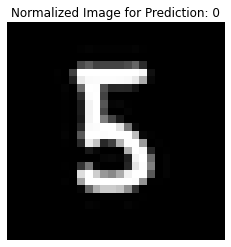

Original Image Array Shape: (28, 28)
Normalized Image Array Shape: (784,)
Normalized Image Array:
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.   

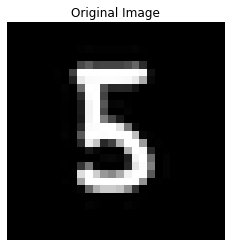

Predictions Shape: (1,)
RandomForest Model not available.
Resized Image Shape: (28, 28)


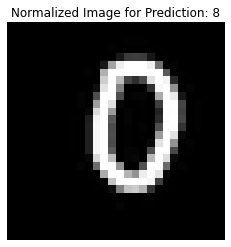

Original Image Array Shape: (28, 28)
Normalized Image Array Shape: (784,)
Normalized Image Array:
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.99607843 0.98823529
 0.98823529 0.98823529 0.99607843 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.      

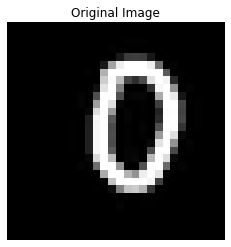

Predictions Shape: (1,)
RandomForest Model not available.
Resized Image Shape: (28, 28)


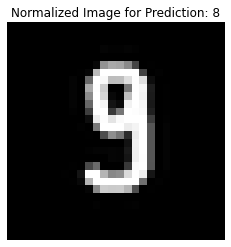

Original Image Array Shape: (28, 28)
Normalized Image Array Shape: (784,)
Normalized Image Array:
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.   

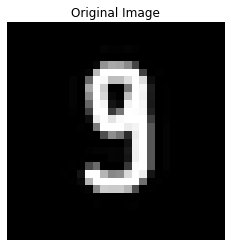

Predictions Shape: (1,)
RandomForest Model not available.
Resized Image Shape: (28, 28)


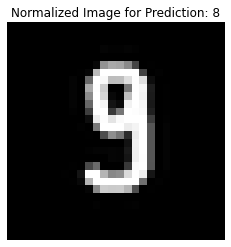

Original Image Array Shape: (28, 28)
Normalized Image Array Shape: (784,)
Normalized Image Array:
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.   

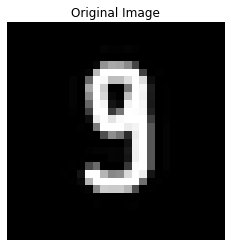

Predictions Shape: (1,)
RandomForest Model not available.
Resized Image Shape: (28, 28)


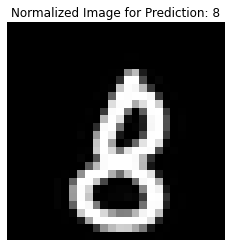

Original Image Array Shape: (28, 28)
Normalized Image Array Shape: (784,)
Normalized Image Array:
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.   

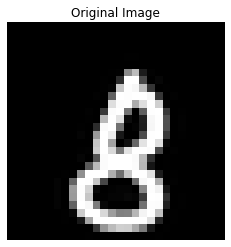

Predictions Shape: (1,)
RandomForest Model not available.
Resized Image Shape: (28, 28)


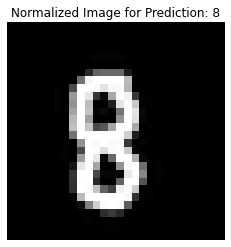

Original Image Array Shape: (28, 28)
Normalized Image Array Shape: (784,)
Normalized Image Array:
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.   

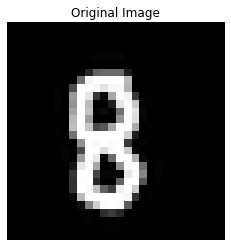

Predictions Shape: (1,)
RandomForest Model not available.


In [50]:
# Afficher l'application Tkinter
#root.mainloop()